In [32]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import heapq, random

%matplotlib inline

### Importing the Data

In [2]:
data = pd.read_excel("data.xlsx",sheet_name = 1)

### Visualizing part of the dataset

In [3]:
data.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


### Checking out the number of missing values in each variable

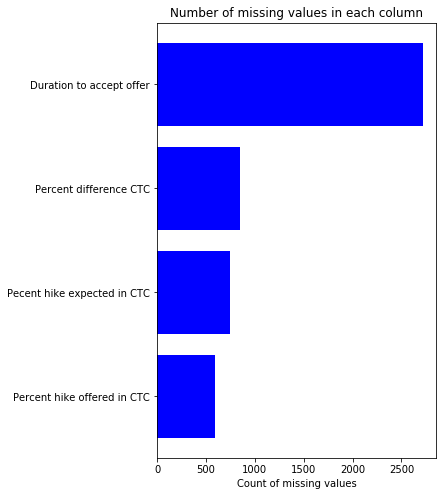

In [11]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

missing = missing_df['column_name']
ind = np.arange(missing_df.shape[0])
width = 0.2
fig, ax = plt.subplots(figsize=(5,8))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

### Visualizing data which are not numbers 

In [4]:
data.select_dtypes(exclude=['int64','float64']).head()

,DOJ Extended,Offered band,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,LOB,Location,Status
0,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


### Check type of variable contents

In [5]:
all_objects = data.select_dtypes(exclude=['int64','float64']).columns.unique()
for i in all_objects:
    print("Variable name: ",i)
    print("Type of values: ", data[i].unique().tolist())

Variable name:  DOJ Extended
Type of values:  ['Yes', 'No']
Variable name:  Offered band
Type of values:  ['E2', 'E1', 'E3', 'E4', 'E0', 'E6', 'E5']
Variable name:  Joining Bonus
Type of values:  ['No', 'Yes']
Variable name:  Candidate relocate actual
Type of values:  ['No', 'Yes']
Variable name:  Gender
Type of values:  ['Female', 'Male']
Variable name:  Candidate Source
Type of values:  ['Agency', 'Employee Referral', 'Direct']
Variable name:  LOB
Type of values:  ['ERS', 'INFRA', 'Healthcare', 'BFSI', 'CSMP', 'ETS', 'AXON', 'EAS', 'SALES', 'CORP', 'BSERV', 'MMS']
Variable name:  Location
Type of values:  ['Noida', 'Chennai', 'Gurgaon', 'Bangalore', 'Kolkata', 'Mumbai', 'Hyderabad', 'Cochin', 'Pune', 'Others', 'Coimbatore', 'Ahmedabad']
Variable name:  Status
Type of values:  ['Joined', 'Not Joined']


### Convert all above variables to numerical format

In [6]:
lb_make = LabelEncoder()

for i in all_objects:
    new_name = "numerical" + i
    data[new_name] = lb_make.fit_transform(data[i])
    del data[i]

### Seeing how the above variables look now

In [7]:
for i in all_objects:
    print("Variable name: ","numerical"+i)
    print("Type of values: ", data["numerical"+i].unique().tolist())

Variable name:  numericalDOJ Extended
Type of values:  [1, 0]
Variable name:  numericalOffered band
Type of values:  [2, 1, 3, 4, 0, 6, 5]
Variable name:  numericalJoining Bonus
Type of values:  [0, 1]
Variable name:  numericalCandidate relocate actual
Type of values:  [0, 1]
Variable name:  numericalGender
Type of values:  [0, 1]
Variable name:  numericalCandidate Source
Type of values:  [0, 2, 1]
Variable name:  numericalLOB
Type of values:  [6, 9, 8, 1, 4, 7, 0, 5, 11, 3, 2, 10]
Variable name:  numericalLocation
Type of values:  [9, 2, 5, 1, 7, 8, 6, 3, 11, 10, 4, 0]
Variable name:  numericalStatus
Type of values:  [0, 1]


In [8]:
for i in missing:
    print(i)

NameError: name 'missing' is not defined

### Interchange NaN value using 
#### a) Mean
#### b) Median
#### c) Prediction

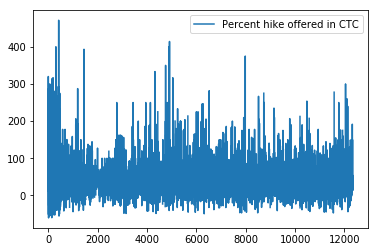

In [12]:
plt.plot(data[missing.unique()[0]], label = missing.unique()[0])
plt.legend()

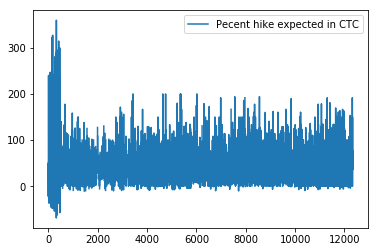

In [13]:
plt.plot(data[missing.unique()[1]], label = missing.unique()[1])
plt.legend()

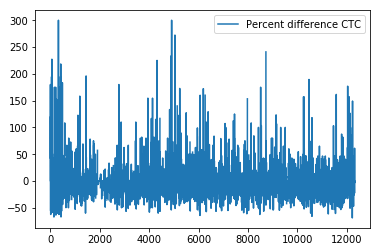

In [14]:
plt.plot(data[missing.unique()[2]], label = missing.unique()[2])
plt.legend()

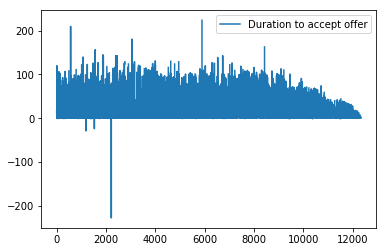

In [15]:
plt.plot(data[missing.unique()[3]], label = missing.unique()[3])
plt.legend()

### From the above plots we can see that the first two variables were centered near the mean and the third variable is centered near the median, so we shall use those values to substitute NaN values

In [16]:
for i in range(0,2):
    number_array = data[data[missing.unique()[i]]!=np.nan][missing.unique()[i]]
    data[missing.unique()[i]] = data[missing.unique()[i]].replace(np.nan,number_array.mean())

number_array = data[data[missing.unique()[2]]!=np.nan][missing.unique()[2]]
data[missing.unique()[2]] = data[missing.unique()[2]].replace(np.nan,number_array.median())

number_array = data[data[missing.unique()[3]]!=np.nan][missing.unique()[3]]
data[missing.unique()[3]] = data[missing.unique()[3]].replace(np.nan,number_array.median())

### Now there are no more missing values

In [17]:
# get the target function
target = data["numericalStatus"]
del data["numericalStatus"]

In [18]:
#divide data into testing and training
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [19]:
models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
    
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("Model : ", model)
    print("Score : ",score)
    print("**"*40)

Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Score :  0.8188082691528172
********************************************************************************
Model :  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Score :  0.705310

### Choosing the best model 

In [20]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Model : ", model)
print("Score : ",score)

Model :  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Score :  0.8248885285772193


In [21]:
# the models we will run
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

# some metrics to help us out
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error as mse

C:\Users\sharan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
dr = DecisionTreeRegressor()
dr.fit(X_train,y_train)
drimp = dr.feature_importances_

In [23]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)
rfrimp = rfr.feature_importances_

In [24]:
gbr =  GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train,y_train)
gbrimp = gbr.feature_importances_

In [25]:
abr =  AdaBoostRegressor(n_estimators=100)
abr.fit(X_train,y_train)
abrimp = abr.feature_importances_

In [26]:
etr =  ExtraTreesRegressor(n_estimators=100)
etr.fit(X_train,y_train)
etrimp = etr.feature_importances_

In [27]:
d = {'Decision Tree':drimp, 'Random Forest':rfrimp, 'Gradient Boost':gbrimp,'Ada boost':abrimp, 'Extra Tree':etrimp}

In [28]:
features = pd.DataFrame(data = d)
# lets check out features
features.head()

,Decision Tree,Random Forest,Gradient Boost,Ada boost,Extra Tree
0,0.135321,0.129630,0.084045,0.000000,0.090330
1,0.189435,0.205090,0.269187,0.342530,0.217167
2,0.065405,0.073403,0.064892,0.309348,0.081706
3,0.074377,0.081453,0.104645,0.000000,0.063668
4,0.083571,0.082241,0.028408,0.000000,0.063709


In [29]:
features['mean'] = features.mean(axis= 1) 
# we forgot to add the names of the features
features['names'] = data.columns.values

In [31]:
features

,Decision Tree,Random Forest,Gradient Boost,Ada boost,Extra Tree,mean,names
0,0.135321,0.129630,0.084045,0.000000,0.090330,0.087865,Candidate Ref
1,0.189435,0.205090,0.269187,0.342530,0.217167,0.244682,Duration to accept offer
2,0.065405,0.073403,0.064892,0.309348,0.081706,0.118951,Notice period
3,0.074377,0.081453,0.104645,0.000000,0.063668,0.064829,Pecent hike expected in CTC
4,0.083571,0.082241,0.028408,0.000000,0.063709,0.051586,Percent hike offered in CTC
5,0.063818,0.057007,0.027023,0.000000,0.060769,0.041723,Percent difference CTC
6,0.045260,0.044205,0.043545,0.000000,0.061914,0.038985,Rex in Yrs
7,0.038591,0.044096,0.039174,0.000000,0.059942,0.036361,Age
8,0.038119,0.031899,0.018135,0.000000,0.026382,0.022907,numericalDOJ Extended
9,0.080515,0.057756,0.049730,0.000000,0.032619,0.044124,numericalOffered band


### Choosing the best 8 features

In [33]:
features.nlargest(8, 'mean')

,Decision Tree,Random Forest,Gradient Boost,Ada boost,Extra Tree,mean,names
1,0.189435,0.205090,0.269187,0.342530,0.217167,0.244682,Duration to accept offer
11,0.064097,0.064268,0.077025,0.348122,0.064097,0.123522,numericalCandidate relocate actual
2,0.065405,0.073403,0.064892,0.309348,0.081706,0.118951,Notice period
0,0.135321,0.129630,0.084045,0.000000,0.090330,0.087865,Candidate Ref
3,0.074377,0.081453,0.104645,0.000000,0.063668,0.064829,Pecent hike expected in CTC
14,0.057462,0.059783,0.141006,0.000000,0.064479,0.064546,numericalLOB
4,0.083571,0.082241,0.028408,0.000000,0.063709,0.051586,Percent hike offered in CTC
9,0.080515,0.057756,0.049730,0.000000,0.032619,0.044124,numericalOffered band


In [37]:
best_names = features.nlargest(8, 'mean').names

In [41]:
#using only the best features
new_data = data[best_names]

#divide data into testing and training
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.2, random_state=42)

In [42]:
models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
    
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("Model : ", model)
    print("Score : ",score)
    print("**"*40)

Model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Score :  0.8236724766923389
********************************************************************************
Model :  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Score :  0.705310

In [43]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Model : ", model)
print("Score : ",score)

Model :  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Score :  0.8248885285772193


In [46]:
#random prediction
rand = np.random.randint(0,12330)
print("Random sample number is: ",rand)
sample_data = np.array(new_data.iloc[rand])
pred = model.predict(sample_data.reshape(1,8))
print("Prediction is: ", pred)
print("Actual Value is: ",target[rand])

Random sample number is:  6664
Prediction is:  [1]
Actual Value is:  1
